# Makemore part 2: MLP

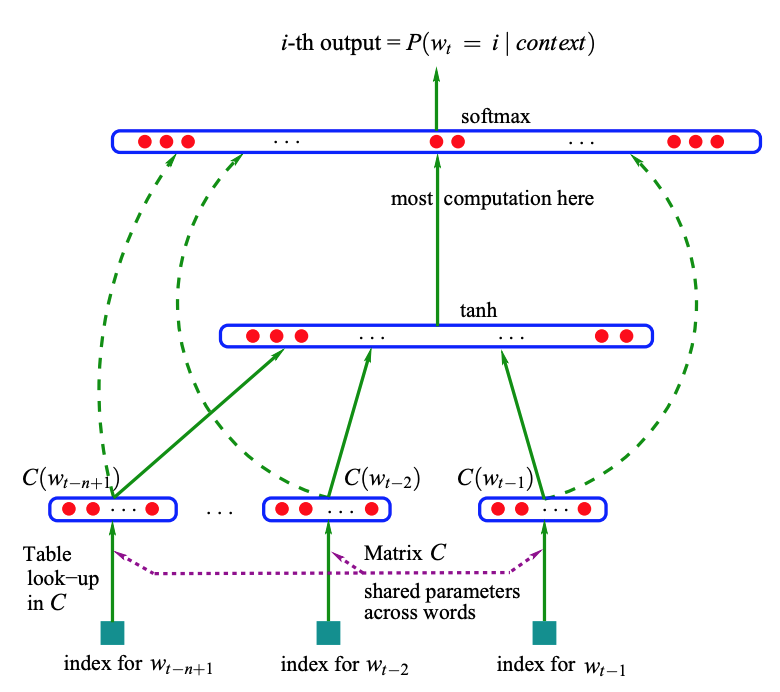

Multi Layer Perceptron to predict the next character in a sequence.

Lookup table C has size [#words x dimensions to compress]

In [3]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt # for making figures
%matplotlib inline

In [4]:
# download the names.txt file from github
!wget https://raw.githubusercontent.com/karpathy/makemore/master/names.txt

--2023-10-19 10:16:38--  https://raw.githubusercontent.com/karpathy/makemore/master/names.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228145 (223K) [text/plain]
Saving to: ‘names.txt’

names.txt           100%[===================>] 222.80K  --.-KB/s    in 0.04s   

2023-10-19 10:16:38 (6.20 MB/s) - ‘names.txt’ saved [228145/228145]



In [5]:
words = open('names.txt', 'r').read().splitlines()
print(len(words))
words[:8]

32033


['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [7]:
# build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [ ]:
# build the dataset printing everything
block_size = 3 # context length: how many characters do we take to predict the next one?
X, Y = [], []

for w in words[:1]:

  #print(w)
  context = [0] * block_size #[0,...,0] lenght = block_size
  print('chs', w+'.')
  for ch in w + '.':
    ix = stoi[ch]
    print('ch: ', ch)
    print('ix: ', ix)
    X.append(context)
    print('X: ', X)
    Y.append(ix)
    print('Y: ',Y)
    print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix] # crop and append
    print('updated context: ',context)
    print('\n\n')

X = torch.tensor(X)
Y = torch.tensor(Y)


chs emma.
ch:  e
ix:  5
X:  [[0, 0, 0]]
Y:  [5]
... ---> e
updated context:  [0, 0, 5]



ch:  m
ix:  13
X:  [[0, 0, 0], [0, 0, 5]]
Y:  [5, 13]
..e ---> m
updated context:  [0, 5, 13]



ch:  m
ix:  13
X:  [[0, 0, 0], [0, 0, 5], [0, 5, 13]]
Y:  [5, 13, 13]
.em ---> m
updated context:  [5, 13, 13]



ch:  a
ix:  1
X:  [[0, 0, 0], [0, 0, 5], [0, 5, 13], [5, 13, 13]]
Y:  [5, 13, 13, 1]
emm ---> a
updated context:  [13, 13, 1]



ch:  .
ix:  0
X:  [[0, 0, 0], [0, 0, 5], [0, 5, 13], [5, 13, 13], [13, 13, 1]]
Y:  [5, 13, 13, 1, 0]
mma ---> .
updated context:  [13, 1, 0]





In [ ]:
  # build the dataset

block_size = 3
X, Y = [], []
for w in words[:5]:

  #print(w)
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix] # crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)

... ---> e
..e ---> m
.em ---> m
emm ---> a
mma ---> .
... ---> o
..o ---> l
.ol ---> i
oli ---> v
liv ---> i
ivi ---> a
via ---> .
... ---> a
..a ---> v
.av ---> a
ava ---> .
... ---> i
..i ---> s
.is ---> a
isa ---> b
sab ---> e
abe ---> l
bel ---> l
ell ---> a
lla ---> .
... ---> s
..s ---> o
.so ---> p
sop ---> h
oph ---> i
phi ---> a
hia ---> .


In [ ]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([5, 3]), torch.int64, torch.Size([5]), torch.int64)

In [ ]:
X

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        [ 5, 13, 13],
        [13, 13,  1],
        [ 0,  0,  0],
        [ 0,  0, 15],
        [ 0, 15, 12],
        [15, 12,  9],
        [12,  9, 22],
        [ 9, 22,  9],
        [22,  9,  1],
        [ 0,  0,  0],
        [ 0,  0,  1],
        [ 0,  1, 22],
        [ 1, 22,  1],
        [ 0,  0,  0],
        [ 0,  0,  9],
        [ 0,  9, 19],
        [ 9, 19,  1],
        [19,  1,  2],
        [ 1,  2,  5],
        [ 2,  5, 12],
        [ 5, 12, 12],
        [12, 12,  1],
        [ 0,  0,  0],
        [ 0,  0, 19],
        [ 0, 19, 15],
        [19, 15, 16],
        [15, 16,  8],
        [16,  8,  9],
        [ 8,  9,  1]])

##Tutorial

In [ ]:
#create lookup table to cram 27 possible characters in a 2 dimensional space
C = torch.rand((27,2))

In [ ]:
#embed an individual integer, e.g.: 5
C[5]

tensor([0.8527, 0.5483])

In [ ]:
F.one_hot(torch.tensor(5), num_classes=27)

tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0])

In [ ]:
F.one_hot(torch.tensor(5), num_classes=27).float() @ C

tensor([0.8527, 0.5483])

As we can see, one-hot encoding selects the 5th row of the C matrix.

Indexing is much more faster than one-hot encoding, so we'll use this method.

Python allows indexing with lists:

In [ ]:
C[[5,6,7]]

tensor([[0.8527, 0.5483],
        [0.4376, 0.1002],
        [0.0632, 0.4297]])

and with tensors of integers:

In [ ]:
C[torch.tensor([5,6,7])]

tensor([[0.8527, 0.5483],
        [0.4376, 0.1002],
        [0.0632, 0.4297]])

we can even repeat indexes:


In [ ]:
C[torch.tensor([5,6,7,7,7])]

tensor([[0.8527, 0.5483],
        [0.4376, 0.1002],
        [0.0632, 0.4297],
        [0.0632, 0.4297],
        [0.0632, 0.4297]])

or use multidimensional tensors of integers as index:

In [ ]:
print(C[X].shape)

print(X[13,2]) #value 1 corresponding to character 'a'

print(C[X][13,2]) #encoding of character 'a' (1), indexed with X coordinates (bidimensional tensor of integers)

print(C[1])

torch.Size([32, 3, 2])
tensor(1)
tensor([0.8198, 0.8830])
tensor([0.8198, 0.8830])


In [ ]:
#embedding
emb = C[X] #embed simultaneously all of the integers in X
emb.shape

torch.Size([32, 3, 2])

Implementation of the hidden layer:

In [ ]:
W1 = torch.randn((6,100)) #n imputs=6 (2dimension embedding x 3 input neurons); 100 neurons in the hidden layer (arbitrary)
b1 = torch.randn(100) #biases

Ww would like to do emb @ W1 + b1, but the multiplication won't work because of the size of emb. We need to properly extract the data.

In [ ]:
torch.cat([emb[:,0,:], emb[:,1,:], emb[:,2,:]], 1).shape #concatenate a list across dimension 1

torch.Size([32, 6])

This is a manual concatenation. In case of changing the block size, we would have to add manually as many dimensions as considered. We can use function unbind

In [ ]:
torch.cat(torch.unbind(emb, 1),1).shape #list of tensors equivalent to previous cell

torch.Size([32, 6])

###Torch memory insights

In [ ]:
a = torch.arange(18)
print(a)
print(a.shape)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])
torch.Size([18])


In [ ]:
a.view(3,3,2)

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]])

In [ ]:
a.storage() #underlying storage as represented in the computer memory: one-dimensional vector

<ipython-input-26-c31d559fd73c>:1: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  a.storage() #underlying storage as represented in the computer memory: one-dimensional vector


 0
 1
 2
 3
 4
 5
 6
 7
 8
 9
 10
 11
 12
 13
 14
 15
 16
 17
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 18]

When we call .view(), no memory is being copied, moved, changed or created. The storage is exactly the same. This makes view extremely efficient

###back to emb

In [ ]:
emb.view(32,6) == torch.cat(torch.unbind(emb, 1),1) #the concatenation is "performed" automatically

tensor([[True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, T

In [ ]:
h =torch.tanh(emb.view(-1,6) @ W1 + b1) #-1 makes Python infer what the value is (emb.shape[0]=32), because the #elements must be the same and we already fixed the 6
#tanh makes the numbers between [-1,1]

In [ ]:
h.shape

torch.Size([32, 100])

Create the final output layer:

In [ ]:
W2 = torch.randn(100,27)
b2 = torch.randn(27)

In [ ]:
logits = h @ W2 + b2 #output of neural net

In [ ]:
logits.shape

torch.Size([32, 27])

In [ ]:
#softmax
counts=logits.exp()
prob = counts / counts.sum(1, keepdims=True)

In [ ]:
print(prob.shape)
print(prob[0].sum())

torch.Size([32, 27])
tensor(1.)


According to label vector Y, we'd like to pluck out the probability assigned to the correct character.

In [ ]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [ ]:
prob[torch.arange(32),Y] #iterate the rows and grab column of Y's value
#ideally, all of these numbers are close to 1 (we haven't trained the network yet)

tensor([2.6485e-17, 8.0054e-20, 1.0352e-21, 1.5799e-29, 5.4320e-10, 2.4335e-21,
        1.5598e-27, 5.8316e-17, 6.9214e-24, 3.1962e-22, 5.2318e-29, 2.1095e-10,
        3.9676e-30, 1.2294e-27, 5.5146e-30, 3.3046e-14, 1.2100e-23, 3.5092e-31,
        2.7585e-27, 6.5168e-28, 6.4298e-08, 2.2063e-31, 3.5046e-19, 2.1776e-27,
        6.8162e-08, 3.0529e-30, 5.2344e-25, 2.1616e-16, 3.1946e-23, 2.5785e-20,
        5.7542e-26, 2.0344e-09])

In [ ]:
#negative log likelihood loss
loss = -prob[torch.arange(32),Y].log().mean()
loss

tensor(49.1293)

## Rearranged

In [ ]:
X.shape, Y.shape

(torch.Size([32, 3]), torch.Size([32]))

In [ ]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6,100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100,27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [ ]:
for p in parameters:
  p.requires_grad = True

In [ ]:
sum(p.nelement() for p in parameters) #total number of parameters

3481

In [ ]:
emb = C[X] # (32, 3, 2)
h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)

#substitute

#counts = logits.exp()
#prob = counts / counts.sum(1, keepdims=True)
#loss = -prob[torch.arange(32), Y].log().mean()

#by
F.cross_entropy(logits, Y)

loss

tensor(17.7697)

In [ ]:
F.cross_entropy(logits, Y)

tensor(17.7697)

Why using cross_entropy?
1. When using cross entropy, Pytorch won't create any intermediate tensors (counts, prob).

2. Also the backward pass is more efficient. Mathematical operations are clustered, so the expressions are more simple.

3. When passing extreme numbers (logit of 100) through the operation exp() required to calculate counts, e^100 gets out of the floating point limits and we get "inf". To solve this, Pytorch offsets logits (just add or substract a value to the whole vector. The probabilities will be maintained) with the maximum value of the logits so it will become 0 and the rest will be negative.

In [ ]:
#Training of the neural net


for _ in range(1000):
  #forward pass
  emb = C[X] # (32, 3, 2)
  h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Y)
  #backward pass
  for p in parameters:
    p.grad = None #zero grad
  loss.backward()

  #update
  for p in parameters:
    p.data += -0.1 * p.grad

print(loss.item())

We are overfitting because we have 3481 parameters for only 32 examples (we only took the first 5 words).

##Using the whole dataset

In [ ]:
# build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [ ]:
 # build the dataset

block_size = 3
X, Y = [], []
for w in words:

  #print(w)
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    #print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix] # crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)

In [ ]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [ ]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6,100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100,27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [ ]:
for p in parameters:
  p.requires_grad = True

In [ ]:
sum(p.nelement() for p in parameters) #total number of parameters

3481

We will now try to find an optimal learning rate:

In [ ]:
torch.linspace(0.001,1,1000); #increase linearly

In [ ]:
lre = torch.linspace(-3,0,1000) #learning rate exponent
lrs = 10**lre #we step linearly between the exponents of these learning rates. But we are spaced exponentially in this interval

In [ ]:
#Training of the neural net

lri = []
lossi = []
stepi = []

for i in range(1000):
  #minibatch construct
  ix = torch.randint(0, X.shape[0], (32,)) #size 32

  #forward pass
  emb = C[X[ix]] # (32, 3, 2)
  h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Y[ix])

  #backward pass
  for p in parameters:
    p.grad = None #zero grad
  loss.backward()

  #update
  #lr = lrs[i] #learning rate
  lr = 0.1
  for p in parameters:
    p.data += -lr * p.grad

  #track stats
  #lri.append(lre[i])
  stepi.append(i)
  lossi.append(loss.item())

print(loss.item())

7.801533222198486


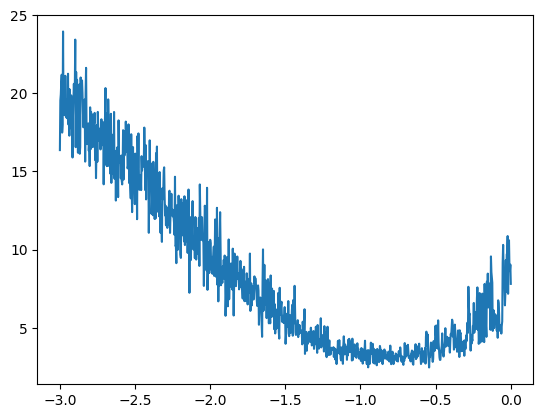

In [ ]:
plt.plot(lri, lossi)

The optimal exponent of the learning rate is around -1. lr = 10**(-1) = 0.1

After a few iterations on training, we could do a learning rate decay (using 0.01) to tune the parameters slower and more precisely.

Training on minibatches, instead of the full dataset, to make it faster:

In [ ]:
torch.randint(0, X.shape[0], (32,)) #32 integers that index into our dataset

tensor([210902,  26983, 141538, 143746, 212393,  81989, 112322,  84858,  78745,
        198829,    995,  81315, 126212, 179143, 118278,  94241,  17026, 193734,
        208793,   2772, 183007,  71668,  77208, 158876,  70233, 201479, 225713,
         34558, 175419,  84782,  24866,   3542])

Because of the minibatches, the quality of the gradients is lower, but good enough to be useful (and faster). Minibatches create some noise in the loss/iterations graph.

#Splitting data

Training (80%), dev/validation (10%), test (10%)

Training: tune the parameters

Dev/validation: tune the hyperparameters: size of the hidden layer, size of the embedding, strength of the regularization, etc.

Test: Evaluate the performance of the model at the end

In [8]:
# build the dataset
block_size = 3 # context length: how many characters do we take to predict the next one?

def build_dataset(words):
  X, Y = [], []
  for w in words:

    #print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape) #we print the number of individual examples, not the words. That's why test>dev
  return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])


torch.Size([182580, 3]) torch.Size([182580])
torch.Size([22767, 3]) torch.Size([22767])
torch.Size([22799, 3]) torch.Size([22799])


In [ ]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30,200), generator=g) #30 = 10 dimensions x 3 input neurons (context)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200,27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

for p in parameters:
  p.requires_grad = True

In [ ]:
lri = []
lossi = []
stepi = []

In [ ]:
#Training of the neural net

for i in range(30000):
  #minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (32,)) #size 32

  #forward pass
  emb = C[Xtr[ix]] # (32, 3, 2)
  h = torch.tanh(emb.view(-1,30) @ W1 + b1) # (32, 100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix])

  #backward pass
  for p in parameters:
    p.grad = None #zero grad
  loss.backward()

  #update
  #lr = lrs[i] #learning rate
  lr = 0.1 if i < 100000 else 0.01
  for p in parameters:
    p.data += -lr * p.grad

  #track stats
  #lri.append(lre[i])
  stepi.append(i)
  lossi.append(loss.log10().item())

print(loss.item())

2.865342855453491


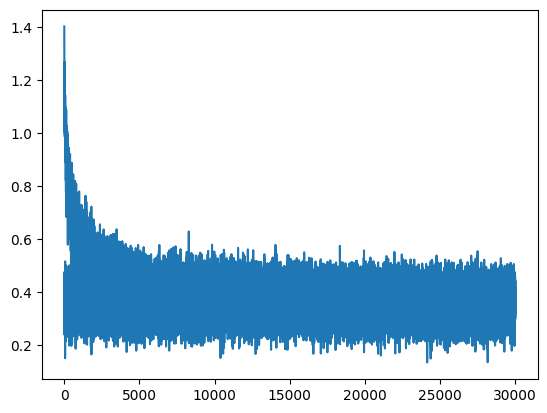

In [ ]:
plt.plot(stepi, lossi)

In [ ]:
#evaluate training loss (not only from minibatch)
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.3077, grad_fn=<NllLossBackward0>)

In [ ]:
#evaluate with unseen data (dev)
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1,30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.3502, grad_fn=<NllLossBackward0>)

If training loss and dev loss are roughly equal (like in this case), we are underfitting. We can improve the performance by scaling up the size of the neural net (instead of using 100 neurons for the hidden layer, we can increase the amount)

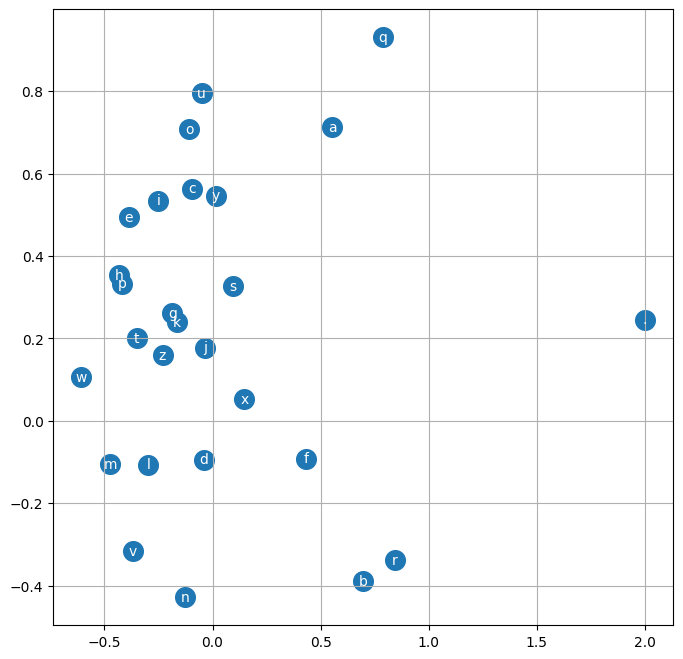

In [ ]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

We observe that vowels are located in a cluster (the network interprets them as similar, even interchangeable), and more infrequent characters have relatively far positions ('q', '.', etc.)

In [ ]:
# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):

    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break

    print(''.join(itos[i] for i in out))

eria.
amyaz.
see.
mel.
rylle.
ever.
cendraeg.
aze.
edreli.
jely.
jelle.
ellestanar.
elly.
moltta.
noshubergahimies.
calle.
ell.
per.
cola.
usza.


#Exercises

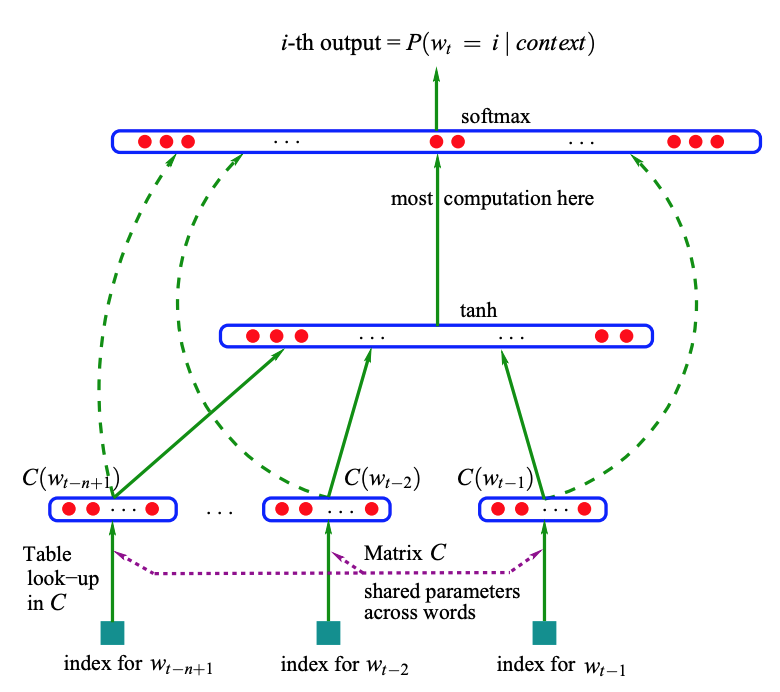

###E01:
Tune the hyperparameters of the training to beat my best validation loss of 2.1701

Knobs available:
- #neurons in hidden layer
- dimensionality of the embedding lookup table
- characters feeding in as context
- optimization details: #iterations, learning rate and how does it change over iterations, how does it decay, batchsize (better convergence speed?)

In [9]:
def dataset_and_split(N_CNTX):
  # build the dataset
  block_size = N_CNTX # context length: how many characters do we take to predict the next one?

  def build_dataset(words):
    X, Y = [], []
    for w in words:

      #print(w)
      context = [0] * block_size
      for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        #print(''.join(itos[i] for i in context), '--->', itos[ix])
        context = context[1:] + [ix] # crop and append

    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape) #we print the number of individual examples, not the words. That's why test>dev
    return X, Y

  import random
  #random.seed(42)
  random.shuffle(words)
  n1 = int(0.8*len(words))
  n2 = int(0.9*len(words))

  Xtr, Ytr = build_dataset(words[:n1])
  Xdev, Ydev = build_dataset(words[n1:n2])
  Xte, Yte = build_dataset(words[n2:])

  return (Xtr, Ytr, Xdev, Ydev, Xte, Yte)

In [10]:
#Build dataset
N_CNTX = 3 #length of the context
Xtr, Ytr, Xdev, Ydev, Xte, Yte = dataset_and_split(N_CNTX)

torch.Size([182661, 3]) torch.Size([182661])
torch.Size([22712, 3]) torch.Size([22712])
torch.Size([22773, 3]) torch.Size([22773])


In [ ]:
#variables

HID_LAY = 200 #neurons hidden layer
DIM_EMB = 10 #dimensions of embedding lookup table
N_CHAR = 27 #number of characters (26 letters + '.')
BATCH_SIZE = 32
N_ITERS = 80000

In [ ]:
from sklearn.model_selection import ParameterGrid
from tqdm import tqdm

params = {
    "batch_size": [16, 32, 64, 128, 256],
    "learn_rate": [0.1, 0.05, 0.01],
    "num_iters": [10000]
}

param_grid = ParameterGrid(params)







for pset in tqdm(param_grid):

  #initialize parameters
  #embedding matrix
  C = torch.randn((N_CHAR, DIM_EMB))
  #hidden layer
  W1 = torch.randn((DIM_EMB*N_CNTX,HID_LAY)) # dimensions x input neurons (context)
  b1 = torch.randn(HID_LAY)
  #output layer
  W2 = torch.randn((HID_LAY,N_CHAR))
  b2 = torch.randn(N_CHAR)
  parameters = [C, W1, b1, W2, b2]

  #enable grads
  for p in parameters:
    p.requires_grad = True


  #Training of the neural net
  for k in range(pset["num_iters"]):
    #minibatch construct
    ix = torch.randint(0, Xtr.shape[0], (pset["batch_size"],)) #size BATCH_SIZE

    #forward pass
    emb = C[Xtr[ix]] # (BATCH_SIZE, N_CNTX, DIM_EMB)
    h = torch.tanh(emb.view(-1,DIM_EMB*N_CNTX) @ W1 + b1) # (BATCH_SIZE, HID_LAY)
    logits = h @ W2 + b2 # (BATCH_SIZE, N_CHAR)
    loss = F.cross_entropy(logits, Ytr[ix])

    #backward pass
    for p in parameters:
      p.grad = None #zero grad
    loss.backward()

    #update
    lr = (pset["learn_rate"] / 10) if k > pset["num_iters"] / 2 else pset["learn_rate"]
    #lr = 0.1 if i < 1000 else 0.01
    for p in parameters:
      p.data += -lr * p.grad

    #track stats
    #lri.append(lre[i])
    #stepi.append(i)
    #lossi.append(loss.log10().item())



  with torch.no_grad():

        print(f"pset: {pset}, 'Minibatch loss: ',{loss.item()}")


        #evaluate with unseen data (dev)
        emb = C[Xdev] # (BATCH_SIZE, N_CNTX, DIM_EMB)
        h = torch.tanh(emb.view(-1,DIM_EMB*N_CNTX) @ W1 + b1) # (BATCH_SIZE, HID_LAY)
        logits = h @ W2 + b2 # (BATCH_SIZE, N_CHAR)
        loss_dev = F.cross_entropy(logits, Ydev)
        print('Dev/Validation : ', loss_dev.item())

        print("\n")


  0%|          | 0/15 [00:00<?, ?it/s]

pset: {'batch_size': 16, 'learn_rate': 0.1, 'num_iters': 10000}, 'Minibatch loss: ',2.6206960678100586


  7%|▋         | 1/15 [00:06<01:31,  6.56s/it]

Training loss:  2.440431833267212
Dev/Validation :  2.455167770385742


pset: {'batch_size': 16, 'learn_rate': 0.05, 'num_iters': 10000}, 'Minibatch loss: ',3.532118558883667


 13%|█▎        | 2/15 [00:12<01:18,  6.00s/it]

Training loss:  2.6479549407958984
Dev/Validation :  2.6744766235351562


pset: {'batch_size': 16, 'learn_rate': 0.01, 'num_iters': 10000}, 'Minibatch loss: ',5.715037822723389


 20%|██        | 3/15 [00:18<01:15,  6.27s/it]

Training loss:  4.154527187347412
Dev/Validation :  4.19591760635376


pset: {'batch_size': 32, 'learn_rate': 0.1, 'num_iters': 10000}, 'Minibatch loss: ',2.282813787460327


 27%|██▋       | 4/15 [00:24<01:07,  6.17s/it]

Training loss:  2.4010722637176514
Dev/Validation :  2.417421817779541


pset: {'batch_size': 32, 'learn_rate': 0.05, 'num_iters': 10000}, 'Minibatch loss: ',1.9534554481506348


 33%|███▎      | 5/15 [00:31<01:04,  6.43s/it]

Training loss:  2.5699541568756104
Dev/Validation :  2.5928332805633545


pset: {'batch_size': 32, 'learn_rate': 0.01, 'num_iters': 10000}, 'Minibatch loss: ',4.280213356018066


 40%|████      | 6/15 [00:37<00:57,  6.34s/it]

Training loss:  4.136472225189209
Dev/Validation :  4.162959575653076


pset: {'batch_size': 64, 'learn_rate': 0.1, 'num_iters': 10000}, 'Minibatch loss: ',2.190938949584961


 47%|████▋     | 7/15 [00:45<00:54,  6.77s/it]

Training loss:  2.386108636856079
Dev/Validation :  2.393108606338501


pset: {'batch_size': 64, 'learn_rate': 0.05, 'num_iters': 10000}, 'Minibatch loss: ',2.370020866394043


 53%|█████▎    | 8/15 [00:53<00:49,  7.12s/it]

Training loss:  2.4706380367279053
Dev/Validation :  2.479747772216797


pset: {'batch_size': 64, 'learn_rate': 0.01, 'num_iters': 10000}, 'Minibatch loss: ',4.041487216949463


 60%|██████    | 9/15 [01:00<00:42,  7.07s/it]

Training loss:  4.19395112991333
Dev/Validation :  4.276298522949219


pset: {'batch_size': 128, 'learn_rate': 0.1, 'num_iters': 10000}, 'Minibatch loss: ',2.806239604949951


 67%|██████▋   | 10/15 [01:09<00:39,  7.87s/it]

Training loss:  2.4186627864837646
Dev/Validation :  2.437804937362671


pset: {'batch_size': 128, 'learn_rate': 0.05, 'num_iters': 10000}, 'Minibatch loss: ',2.5100574493408203


 73%|███████▎  | 11/15 [01:19<00:33,  8.39s/it]

Training loss:  2.49082350730896
Dev/Validation :  2.4930801391601562


pset: {'batch_size': 128, 'learn_rate': 0.01, 'num_iters': 10000}, 'Minibatch loss: ',4.127249240875244


 80%|████████  | 12/15 [01:28<00:25,  8.60s/it]

Training loss:  4.021251678466797
Dev/Validation :  4.0607147216796875


pset: {'batch_size': 256, 'learn_rate': 0.1, 'num_iters': 10000}, 'Minibatch loss: ',2.4420104026794434


 87%|████████▋ | 13/15 [01:42<00:20, 10.09s/it]

Training loss:  2.3649654388427734
Dev/Validation :  2.378652334213257


pset: {'batch_size': 256, 'learn_rate': 0.05, 'num_iters': 10000}, 'Minibatch loss: ',2.625338077545166


 93%|█████████▎| 14/15 [01:55<00:11, 11.08s/it]

Training loss:  2.519906759262085
Dev/Validation :  2.544365167617798


pset: {'batch_size': 256, 'learn_rate': 0.01, 'num_iters': 10000}, 'Minibatch loss: ',4.403627872467041


100%|██████████| 15/15 [02:08<00:00,  8.58s/it]

Training loss:  4.300304412841797
Dev/Validation :  4.3188090324401855




We observe a minimum Validation error with a batch size = 256 and a learning rate = 0.1

We can train more and fine-tune this combination of parameters:

In [14]:
#variables

HID_LAY = 200 #neurons hidden layer
DIM_EMB = 10 #dimensions of embedding lookup table
N_CHAR = 27 #number of characters (26 letters + '.')
BATCH_SIZE = 256
N_ITERS = 50000

In [15]:
#initialize parameters

#embedding matrix
C = torch.randn((N_CHAR, DIM_EMB))
#hidden layer
W1 = torch.randn((DIM_EMB*N_CNTX,HID_LAY)) # dimensions x input neurons (context)
b1 = torch.randn(HID_LAY)
#output layer
W2 = torch.randn((HID_LAY,N_CHAR))
b2 = torch.randn(N_CHAR)
parameters = [C, W1, b1, W2, b2]

#enable grads
for p in parameters:
  p.requires_grad = True


#Training of the neural net
for i in range(N_ITERS):
  #minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (BATCH_SIZE,)) #size BATCH_SIZE

  #forward pass
  emb = C[Xtr[ix]] # (BATCH_SIZE, N_CNTX, DIM_EMB)
  h = torch.tanh(emb.view(-1,DIM_EMB*N_CNTX) @ W1 + b1) # (BATCH_SIZE, HID_LAY)
  logits = h @ W2 + b2 # (BATCH_SIZE, N_CHAR)
  loss = F.cross_entropy(logits, Ytr[ix])

  #backward pass
  for p in parameters:
    p.grad = None #zero grad
  loss.backward()

  #update
  lr = 0.1 if i < 50000 else 0.01
  for p in parameters:
    p.data += -lr * p.grad

  #track stats
  #lri.append(lre[i])
  #stepi.append(i)
  #lossi.append(loss.log10().item())




#evaluate with unseen data (dev)
emb = C[Xdev] # (BATCH_SIZE, N_CNTX, DIM_EMB)
h = torch.tanh(emb.view(-1,DIM_EMB*N_CNTX) @ W1 + b1) # (BATCH_SIZE, HID_LAY)
logits = h @ W2 + b2 # (BATCH_SIZE, N_CHAR)
loss_dev = F.cross_entropy(logits, Ydev)
print('Dev/Validation : ', loss_dev.item())


Dev/Validation :  2.2435035705566406


###E02:
I was not careful with the intialization of the network in this video.
(1) What is the loss you'd get if the predicted probabilities at initialization were perfectly uniform? What loss do we achieve? (2) Can you tune the initialization to get a starting loss that is much more similar to (1)?

With a perfectly uniform distribution, the output of the softmax applied to the logits should give us an array of constants = 1/27.

Instead of initializing the parameters randomly, we can set specific values:

In [19]:
HID_LAY = 200 #neurons hidden layer
DIM_EMB = 10 #dimensions of embedding lookup table
N_CHAR = 27 #number of characters (26 letters + '.')
BATCH_SIZE = 256
N_ITERS = 50000

C = torch.full((N_CHAR, DIM_EMB), fill_value=1.0)
W1 = torch.full((DIM_EMB*N_CNTX,HID_LAY), fill_value=0.5) # dimensions x input neurons (context)
b1 = torch.full((1,HID_LAY), fill_value=1.0)
W2 = torch.full((HID_LAY,N_CHAR), fill_value=0.5)
b2 = torch.full((1,N_CHAR), fill_value=1.0)
parameters = [C, W1, b1, W2, b2]

In [20]:
#forward pass
emb = C[Xtr[ix]] # (BATCH_SIZE, N_CNTX, DIM_EMB)
h = torch.tanh(emb.view(-1,DIM_EMB*N_CNTX) @ W1 + b1) # (BATCH_SIZE, HID_LAY)
logits = h @ W2 + b2 # (BATCH_SIZE, N_CHAR)
print(torch.softmax(logits, dim=1))
loss = F.cross_entropy(logits, Ytr[ix])

print(f"initial loss: {loss.item()}")

tensor([[0.0370, 0.0370, 0.0370,  ..., 0.0370, 0.0370, 0.0370],
        [0.0370, 0.0370, 0.0370,  ..., 0.0370, 0.0370, 0.0370],
        [0.0370, 0.0370, 0.0370,  ..., 0.0370, 0.0370, 0.0370],
        ...,
        [0.0370, 0.0370, 0.0370,  ..., 0.0370, 0.0370, 0.0370],
        [0.0370, 0.0370, 0.0370,  ..., 0.0370, 0.0370, 0.0370],
        [0.0370, 0.0370, 0.0370,  ..., 0.0370, 0.0370, 0.0370]])
initial loss: 3.295837163925171


###E03:
Read the Bengio et al 2003 paper (link above), implement and try any idea from the paper. Did it work?

They add a regularization term in the computation of the log-likelihood: R is a weight decay penalty applied only to the weights of the neural network and to the C matrix, not to the biases.

Regularization is used to avoid overfitting. In this case, we are penalising W1 and W2 being far from 0. In that undesirable case, a small change in the input will produce a big change in output, so unseen data won't be processed accurately (overfitting)

 Making the weights close to 0 will make the probability distribution more uniform and the model less unstable.

In [11]:
#variables

HID_LAY = 200 #neurons hidden layer
DIM_EMB = 10 #dimensions of embedding lookup table
N_CHAR = 27 #number of characters (26 letters + '.')
BATCH_SIZE = 256
N_ITERS = 80000

REG = 0.01

In [18]:
#initialize parameters

#embedding matrix
C = torch.randn((N_CHAR, DIM_EMB))
#hidden layer
W1 = torch.randn((DIM_EMB*N_CNTX,HID_LAY)) # dimensions x input neurons (context)
b1 = torch.randn(HID_LAY)
#output layer
W2 = torch.randn((HID_LAY,N_CHAR))
b2 = torch.randn(N_CHAR)
parameters = [C, W1, b1, W2, b2]

#enable grads
for p in parameters:
  p.requires_grad = True


#Training of the neural net
for i in range(N_ITERS):
  #minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (BATCH_SIZE,)) #size BATCH_SIZE

  #forward pass
  emb = C[Xtr[ix]] # (BATCH_SIZE, N_CNTX, DIM_EMB)
  h = torch.tanh(emb.view(-1,DIM_EMB*N_CNTX) @ W1 + b1) # (BATCH_SIZE, HID_LAY)
  logits = h @ W2 + b2 # (BATCH_SIZE, N_CHAR)
  loss = F.cross_entropy(logits, Ytr[ix]) + REG*(W1.pow(2).mean() + W2.pow(2).mean())

  #backward pass
  for p in parameters:
    p.grad = None #zero grad
  loss.backward()

  #update
  lr = 0.1 if i < 5000000 else 0.01
  for p in parameters:
    p.data += -lr * p.grad

  #track stats
  #lri.append(lre[i])
  #stepi.append(i)
  #lossi.append(loss.log10().item())




#evaluate with unseen data (dev)
emb = C[Xdev] # (BATCH_SIZE, N_CNTX, DIM_EMB)
h = torch.tanh(emb.view(-1,DIM_EMB*N_CNTX) @ W1 + b1) # (BATCH_SIZE, HID_LAY)
logits = h @ W2 + b2 # (BATCH_SIZE, N_CHAR)
loss_dev = F.cross_entropy(logits, Ydev)
print('Dev/Validation : ', loss_dev.item())

Dev/Validation :  2.207199811935425


In [19]:
#evaluate training loss (not only from minibatch)
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1, DIM_EMB*N_CNTX) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.1680, grad_fn=<NllLossBackward0>)

Gradien descent with momentum: